In [12]:
# loading all the dataset for biometric
import pandas as pd

bio1 = pd.read_csv(r'C:\Users\ankit\Desktop\uidai\data_set\api_data_aadhar_biometric\api_data_aadhar_biometric_0_500000.csv')
bio2 = pd.read_csv(r'C:\Users\ankit\Desktop\uidai\data_set\api_data_aadhar_biometric\api_data_aadhar_biometric_500000_1000000.csv')
bio3 = pd.read_csv(r'C:\Users\ankit\Desktop\uidai\data_set\api_data_aadhar_biometric\api_data_aadhar_biometric_1000000_1500000.csv')
bio4 = pd.read_csv(r'C:\Users\ankit\Desktop\uidai\data_set\api_data_aadhar_biometric\api_data_aadhar_biometric_1500000_1861108.csv')

biometric_data = pd.concat([bio1, bio2, bio3, bio4], ignore_index=True)


In [16]:
biometric_data.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577
1,2025-03-01,Bihar,Madhepura,852121,144,369
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091
3,2025-03-01,Bihar,Bhojpur,802158,256,980
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815


In [15]:
biometric_data['date'] = pd.to_datetime(
    biometric_data['date'],
    format='%d-%m-%Y'
)


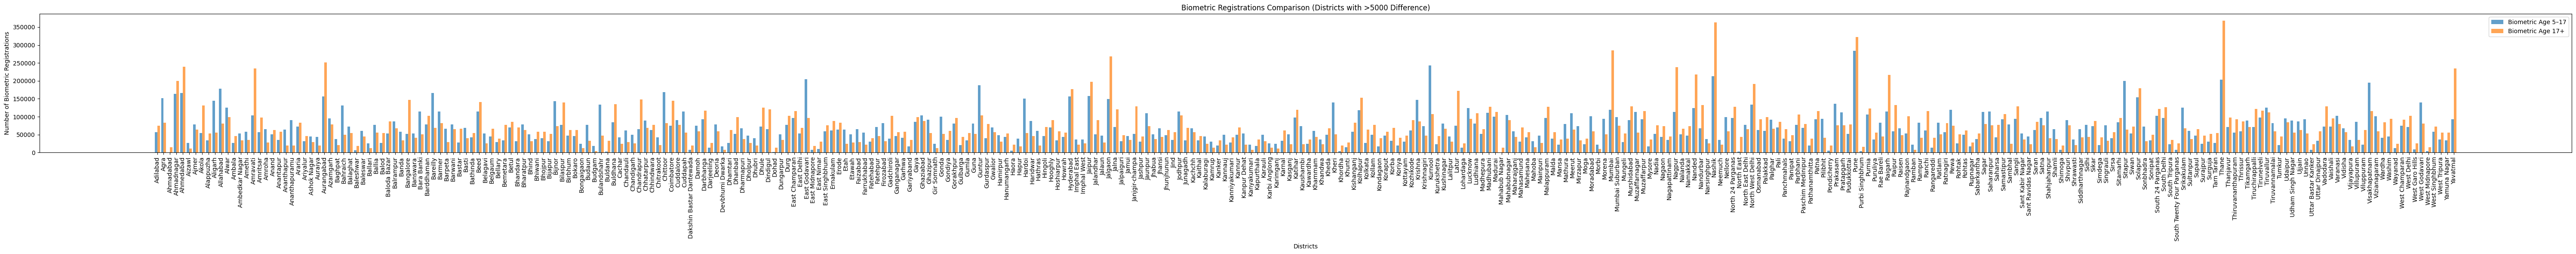

In [41]:
biometric_data.groupby(['district'])[['bio_age_5_17','bio_age_17_']].sum()
import matplotlib.pyplot as plt
import numpy as np
# Group once (cleaner and safer)
grouped = biometric_data.groupby('district')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()
grouped['ratio'] = grouped['bio_age_5_17'] /(grouped['bio_age_17_'] + 1)  # to avoid division by zero

grouped['difference'] = abs(grouped['bio_age_5_17'] - grouped['bio_age_17_'])

filtered = grouped[grouped['difference'] > 10000]
districts = filtered['district']
age_5_17 = filtered['bio_age_5_17']
age_17_plus = filtered['bio_age_17_']

x = np.arange(len(districts))
width = 0.4

plt.figure(figsize=(60, 6))

plt.bar(
    x - width/2,
    age_5_17,
    width,
    label='Biometric Age 5–17',
    alpha=0.7
)

plt.bar(
    x + width/2,
    age_17_plus,
    width,
    label='Biometric Age 17+',
    alpha=0.7
)

plt.xlabel('Districts')
plt.ylabel('Number of Biometric Registrations')
plt.title('Biometric Registrations Comparison (Districts with >5000 Difference)')
plt.xticks(x, districts, rotation=90)
plt.legend()
plt.tight_layout()
plt.show() # from here we get the districts where there is huge difference in the biometric data and this is the pointing situation


In [ ]:
# the place need high compilance where the ratio is greater then the mean one
mean_ratio = grouped['ratio'].mean() 
high_compliance_districts = grouped[grouped['ratio'] > mean_ratio]

import plotly.express as px

mean_ratio = grouped['ratio'].mean()
high_compliance_districts = grouped[grouped['ratio'] > mean_ratio]

fig = px.scatter(
    high_compliance_districts,
    x='district',
    y='ratio',
    title='High Compliance Districts Based on Biometric Age Ratio',
    labels={
        'district': 'District',
        'ratio': 'Ratio (Age 5–17 / Age 17+)'
    },
    hover_data={
        'bio_age_5_17': True,
        'bio_age_17_': True,
        'ratio': ':.2f'
    }
)

# Add mean reference line
fig.add_hline(
    y=mean_ratio,
    line_dash='dash',
    annotation_text='Mean Ratio',
    annotation_position='top left'
)

# Layout polish
fig.update_layout(
    xaxis_tickangle=90,
    template='plotly_white',
    height=500,
    margin=dict(l=40, r=40, t=60, b=120)
)

fig.show() # here the idea is more resource require to be focused on the high compliance districts
